In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import statsmodels.api as sm
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

1a. Perform preliminary data inspection and report the findings on the structure of the data, missing values, duplicates, etc.

In [21]:
df = pd.read_excel('CEP_1_Dataset.xlsx')

# Step 1.1: Preliminary Data Inspection
print(df.shape)
print(df.info())
print(df.duplicated().sum())
df.head(3)

(303, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None
1


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [22]:
df.nunique(axis=0)

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [23]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


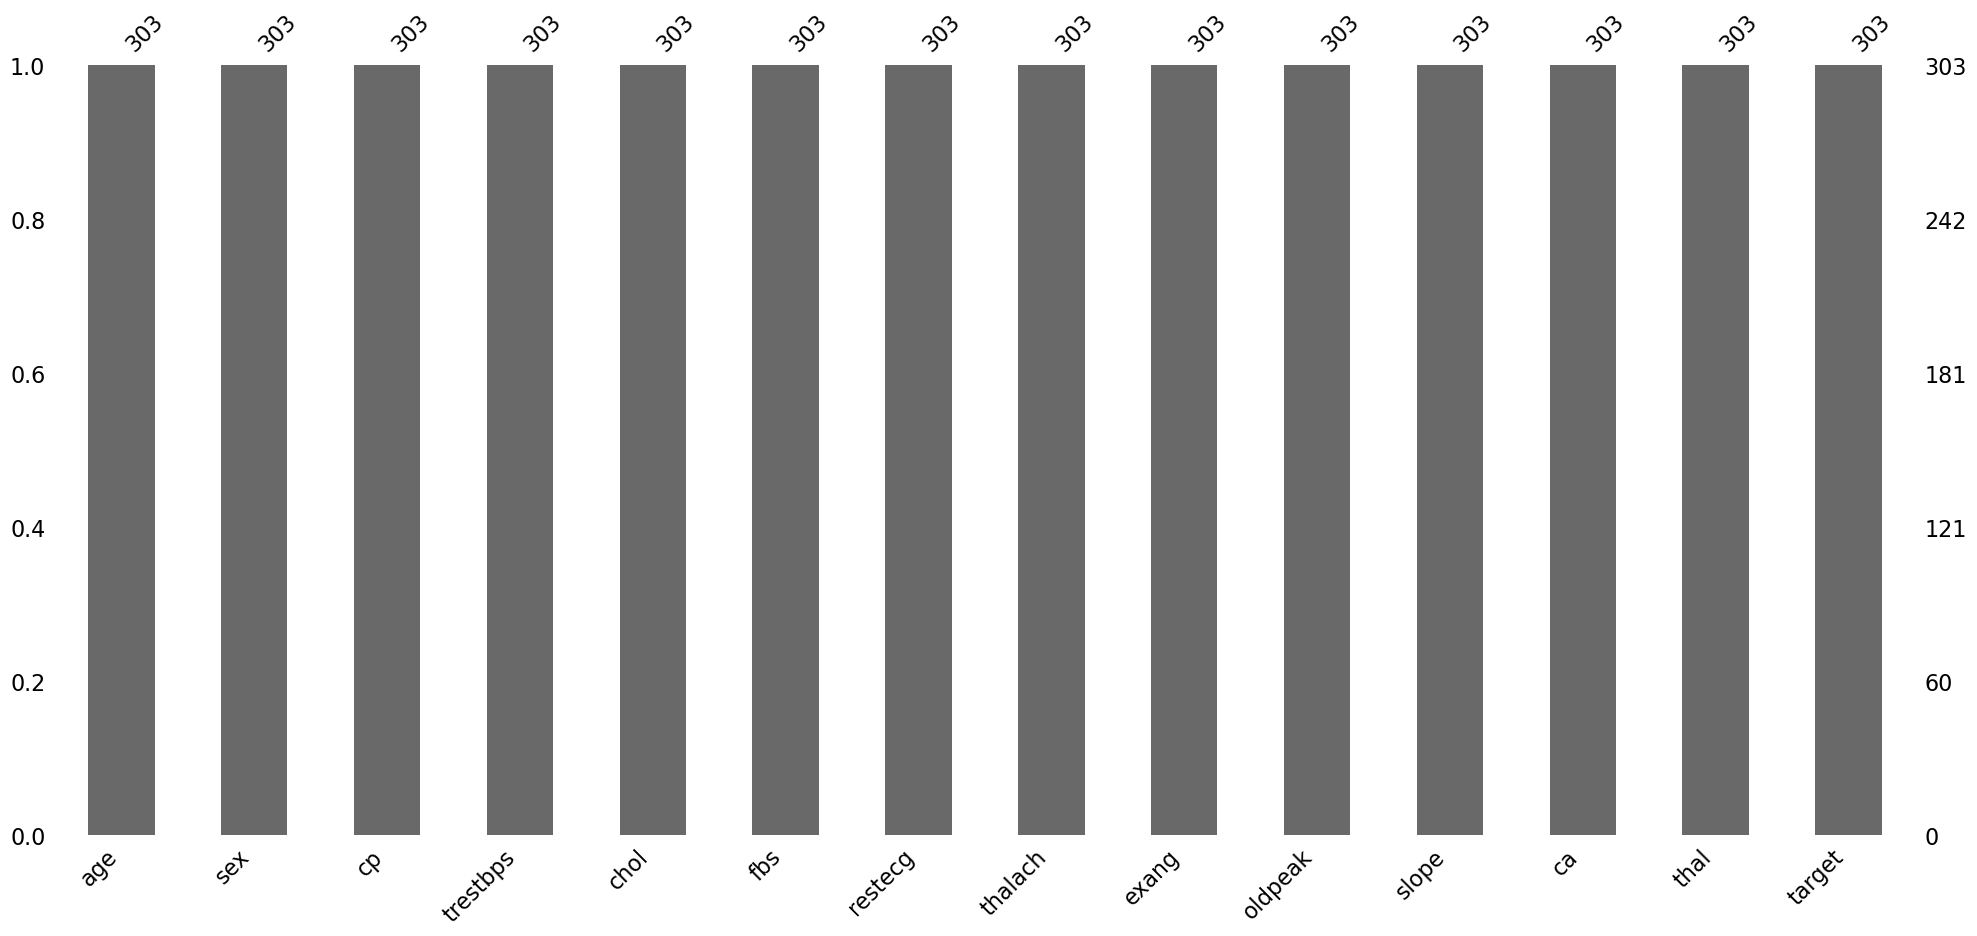

In [24]:
msno.bar(df)
plt.show()

1b. Based on these findings, remove duplicates (if any) and treat missing values using an appropriate strategy

No Missing Values!

In [25]:
df.drop_duplicates(inplace=True)
df.duplicated().any()

False

2a. Get a preliminary statistical summary of the data and explore the measures of central tendencies and spread of the data

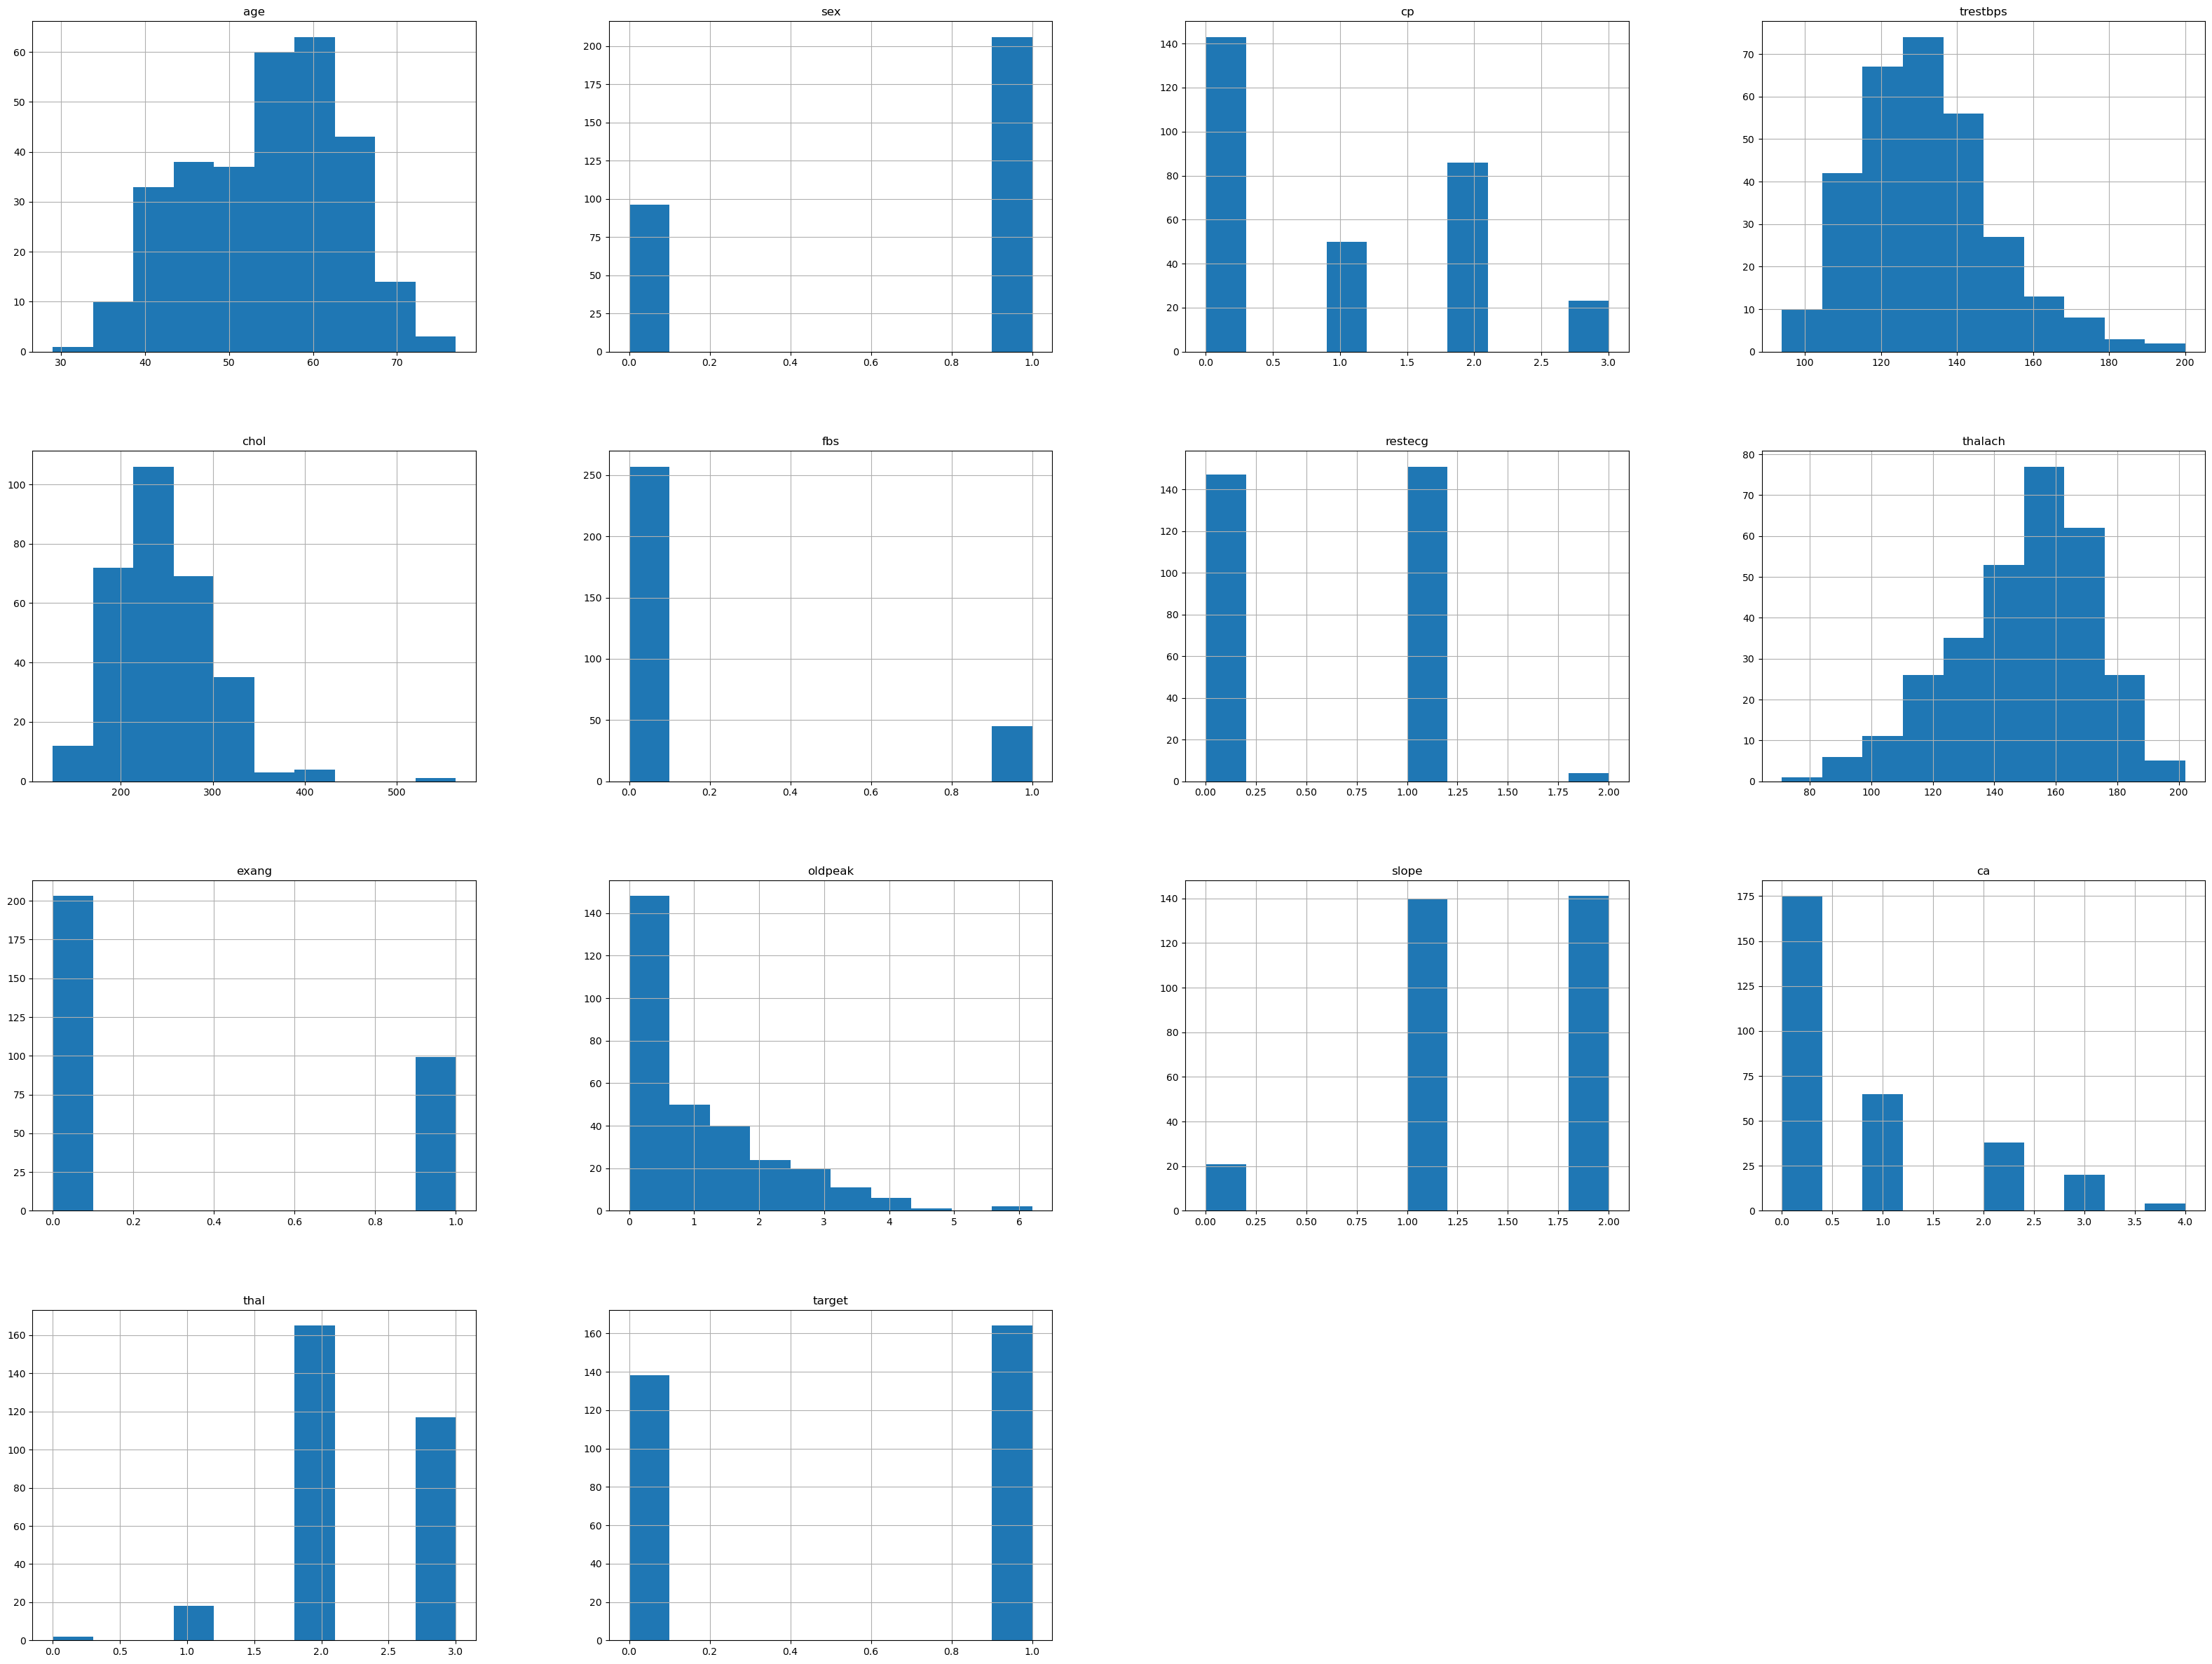

In [26]:
# Data Visualization
fig = plt.figure(figsize = (40,30))
df.hist(ax = fig.gca());

2b. Identify the data variables which are categorical and describe and explore these variables using the appropriate tools, such as count plot

In [27]:
# Function to determine categorical variables with heuristics
def identify_categorical(df, threshold=10):
    categorical_vars = []
    for column in df.columns:
        unique_values = df[column].nunique()
        if unique_values <= threshold and df[column].dtype == 'object':
            categorical_vars.append(column)
        elif unique_values <= threshold and df[column].dtype != 'object':
            if unique_values < len(df) * 0.05:
                categorical_vars.append(column)
    return categorical_vars

categorical_vars = identify_categorical(df)
numerical_vars = [col for col in df.columns if col not in categorical_vars]

print("Identified Categorical Variables:", categorical_vars)
print("Identified Numerical Variables:", numerical_vars)

Identified Categorical Variables: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
Identified Numerical Variables: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


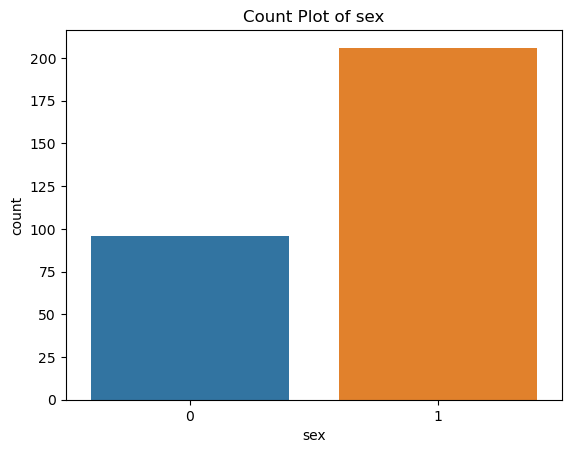

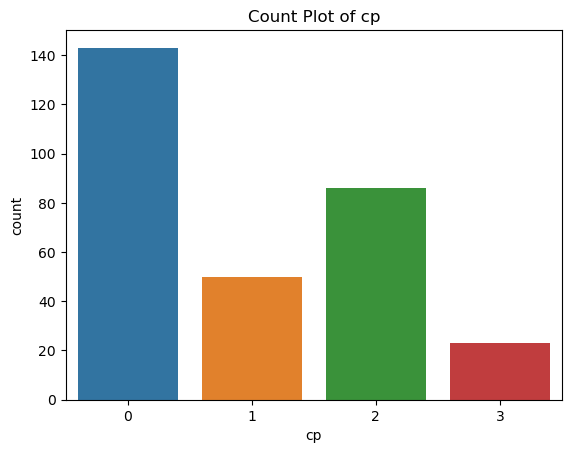

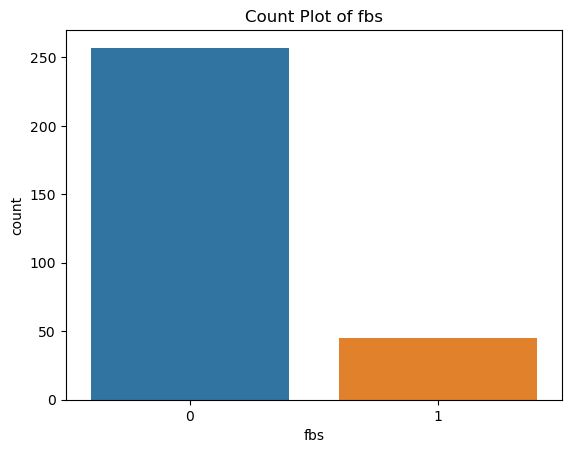

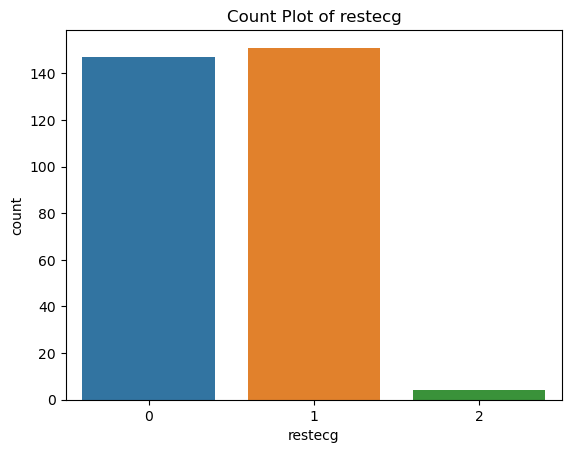

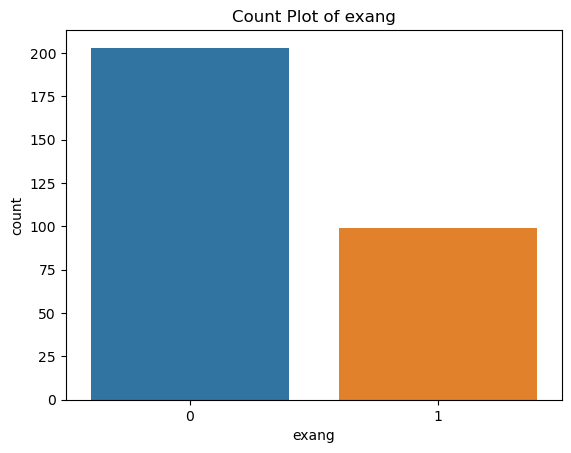

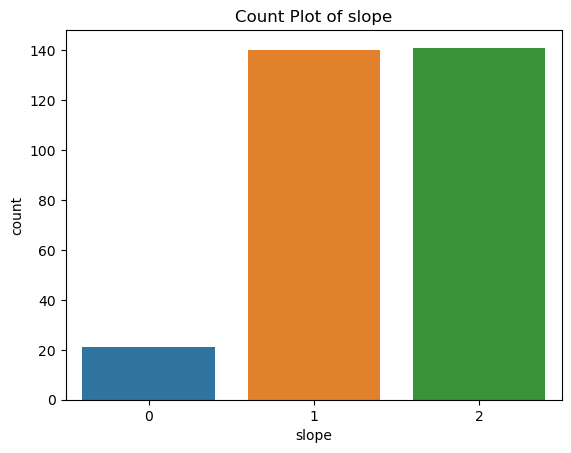

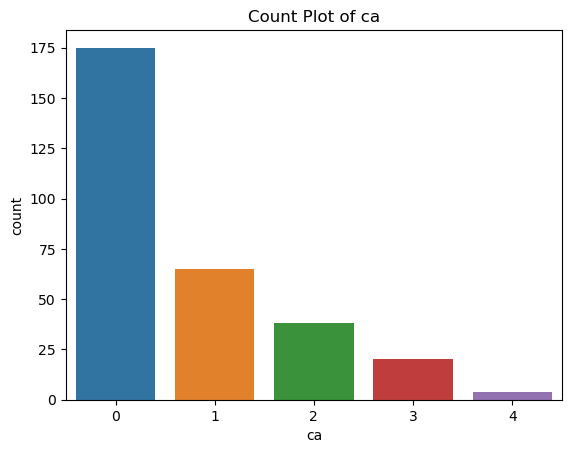

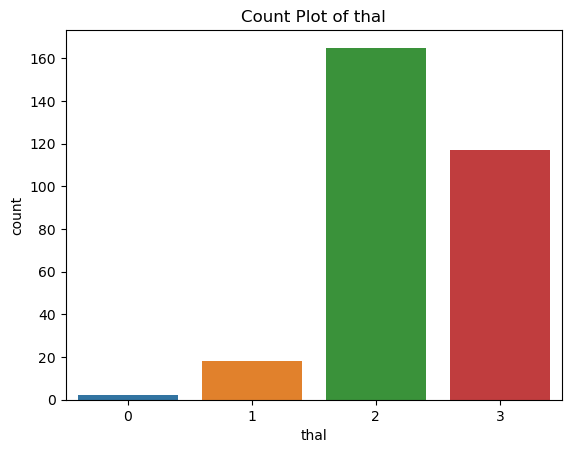

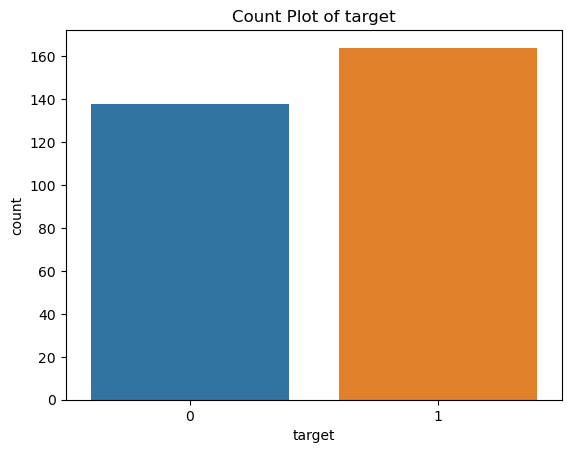

In [28]:
# Visualize categorical variables
for var in categorical_vars:
    sns.countplot(x=var, data=df)
    plt.title(f'Count Plot of {var}')
    plt.show()

From the above plots, we can see significant SKEW and lack of NORMAL distribution.

2c - Study the occurrence of CVD across the Age category

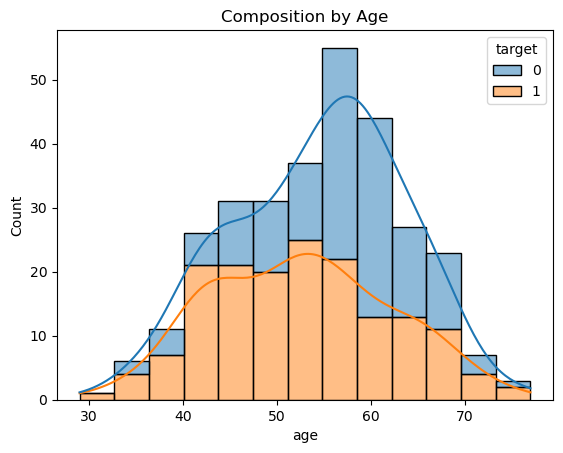

In [48]:
sns.histplot(data=df, x='age', hue='target', multiple='stack', kde=True)
plt.title('Composition by Age')
plt.show()

2d. Composition of all patients with respect to Sex

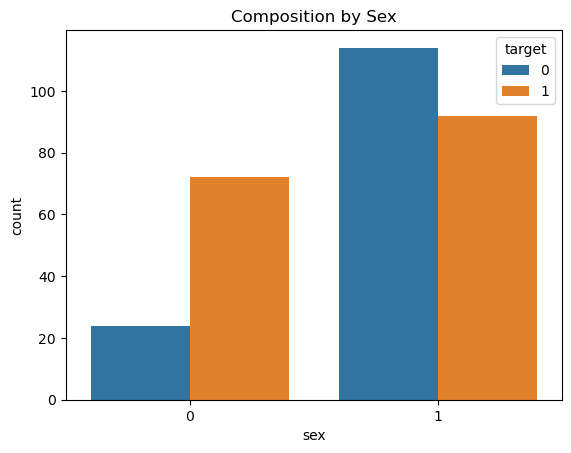

In [29]:
sns.countplot(x='sex', hue='target', data=df)
plt.title('Composition by Sex')
plt.show()

2e - detection of heart attacks based on trestbps

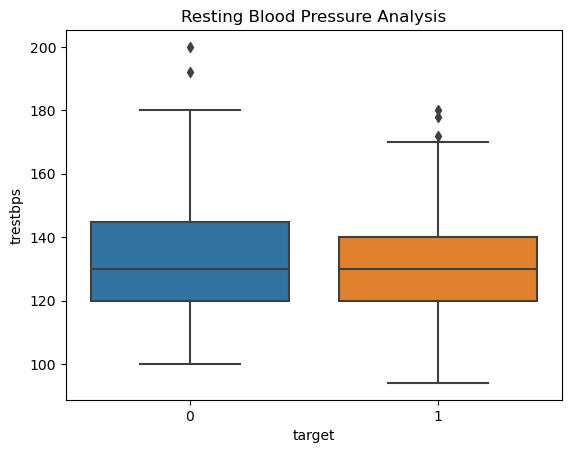

In [30]:
# box plot
sns.boxplot(x='target', y='trestbps', data=df)
plt.title('Resting Blood Pressure Analysis')
plt.show()

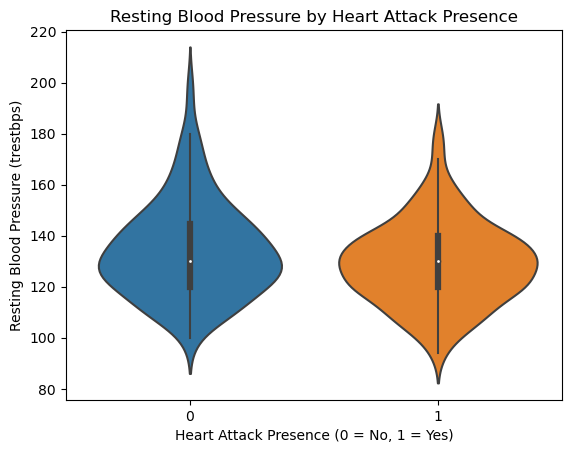

In [49]:
sns.violinplot(x='target', y='trestbps', data=df)
plt.title('Resting Blood Pressure by Heart Attack Presence')
plt.xlabel('Heart Attack Presence (0 = No, 1 = Yes)')
plt.ylabel('Resting Blood Pressure (trestbps)')
plt.show()

In [50]:
from scipy.stats import ttest_ind

# Separate the trestbps values based on target
trestbps_no_attack = df[df['target'] == 0]['trestbps']
trestbps_attack = df[df['target'] == 1]['trestbps']

# Perform t-test
t_stat, p_value = ttest_ind(trestbps_no_attack, trestbps_attack)
print(f'T-Test Statistic: {t_stat}, P-Value: {p_value}')

T-Test Statistic: 2.5609912831268065, P-Value: 0.010926538861949147


The P value is < 0.005 - trestbps is a statistically significant feature to detect heart attacsk.

2f - Describe the relationship between cholesterol levels and a target variable

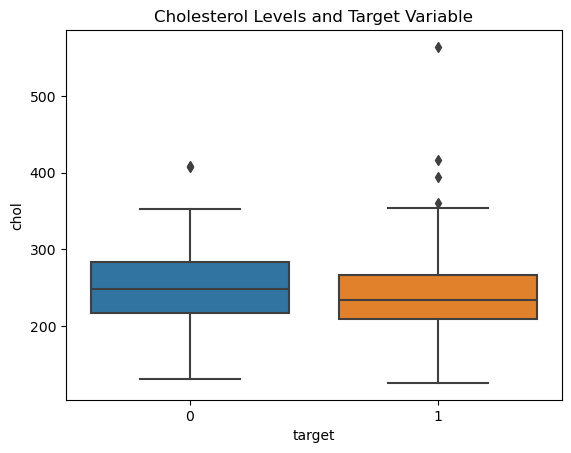

In [31]:
sns.boxplot(x='target', y='chol', data=df)
plt.title('Cholesterol Levels and Target Variable')
plt.show()

2g. State what relationship exists between peak exercising and the occurrence of a heart attack

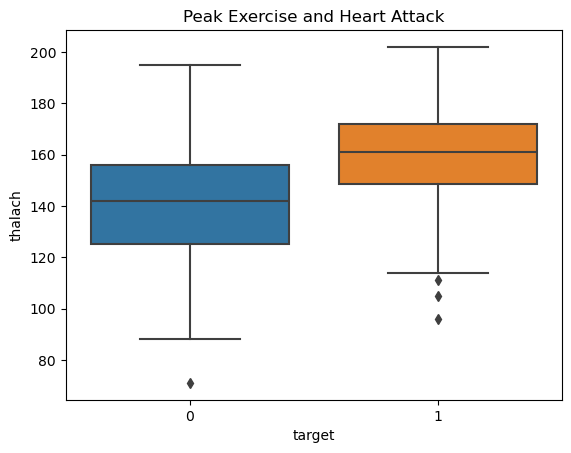

In [32]:
sns.boxplot(x='target', y='thalach', data=df)
plt.title('Peak Exercise and Heart Attack')
plt.show()

In [51]:
summary_stats = df.groupby('target')['thalach'].describe()
print(summary_stats)

# Separate the thalach values based on target
thalach_no_attack = df[df['target'] == 0]['thalach']
thalach_attack = df[df['target'] == 1]['thalach']

# Perform t-test
t_stat, p_value = ttest_ind(thalach_no_attack, thalach_attack)
print(f'T-Test Statistic: {t_stat}, P-Value: {p_value}')

        count        mean        std   min     25%    50%    75%    max
target                                                                 
0       138.0  139.101449  22.598782  71.0  125.00  142.0  156.0  195.0
1       164.0  158.378049  19.199080  96.0  148.75  161.0  172.0  202.0
T-Test Statistic: -8.014848252140112, P-Value: 2.4761460479234722e-14


Confirmed statistical relationship between thalach and CVD - patients without CVD experienced a mean of ~139 thalac vs 158

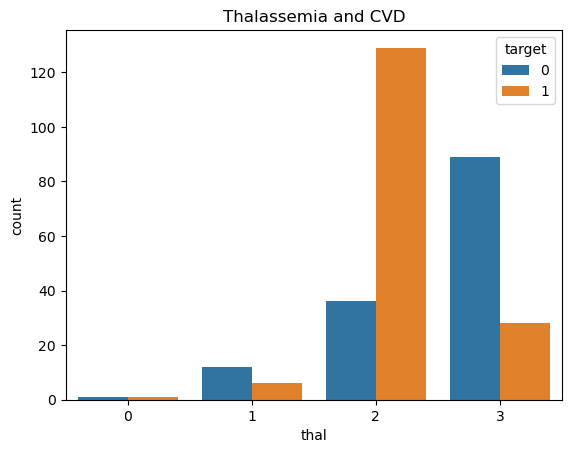

In [33]:
sns.countplot(x='thal', hue='target', data=df)
plt.title('Thalassemia and CVD')
plt.show()

In [52]:
# Separate the thalvalues based on target
thal_no_attack = df[df['target'] == 0]['thal']
thal_attack = df[df['target'] == 1]['thal']

# Perform t-test
t_stat, p_value = ttest_ind(thal_no_attack, thal_attack)
print(f'T-Test Statistic: {t_stat}, P-Value: {p_value}')

T-Test Statistic: 6.3267192360120825, P-Value: 9.089044024817941e-10


Another p value below 0.05, confirming statistically significant thalassemia and CVD relationship

2i. List how the other factors determine the occurrence of CVD

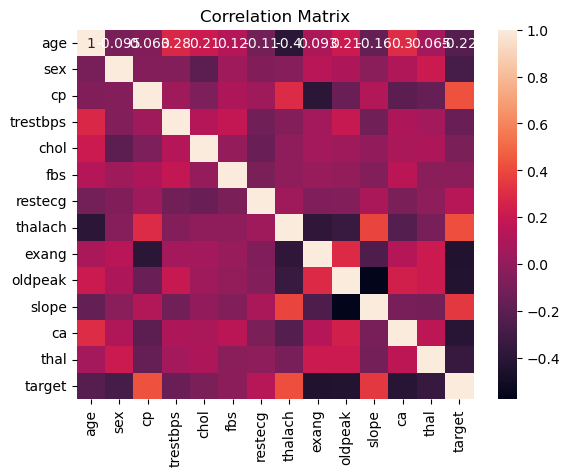

In [34]:
df_encoded = pd.get_dummies(df, drop_first=True)

# Calculate the correlation matrix after encoding
correlation_matrix = df_encoded.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

Use a pair plot to understand the relationship between all the given variables

Interactive graphs of pairplots

In [35]:
# Using Plotly Matrix
fig = px.scatter_matrix(df_encoded, dimensions=df_encoded.columns[:-1], color='target')  # Exclude the target column from dimensions
fig.update_layout(title='Pair Plot', width=1800, height=1800)  # Adjust width and height as needed
fig.show()


Build a baseline model to predict the risk of a heart attack using a logistic regression and random forest and explore the results while using correlation analysis and logistic regression (leveraging standard error and p-values from statsmodels) for feature selection

In [36]:
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict and evaluate the model
y_pred_log_reg = log_reg.predict(X_test)
print(f'Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log_reg)}')

Logistic Regression Accuracy: 0.8524590163934426


In [39]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

# Predict and evaluate the model
y_pred_rf = rf_clf.predict(X_test)
print(f'Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf)}')

Random Forest Accuracy: 0.8688524590163934


In [41]:
# Feature importance from Random Forest
importances = rf_clf.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
print(feature_importance_df.sort_values(by='Importance', ascending=False))

     Feature  Importance
9    oldpeak    0.125276
11        ca    0.120243
7    thalach    0.114492
12      thal    0.114438
2         cp    0.111230
0        age    0.092045
4       chol    0.079670
3   trestbps    0.078629
8      exang    0.053658
10     slope    0.045805
1        sex    0.036947
6    restecg    0.020472
5        fbs    0.007096


In [42]:
# Logistic Regression with statsmodels for p-values
import statsmodels.api as sm

log_reg_model = sm.Logit(y_train, X_train)
result = log_reg_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.351487
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  241
Model:                          Logit   Df Residuals:                      228
Method:                           MLE   Df Model:                           12
Date:                Sun, 09 Jun 2024   Pseudo R-squ.:                  0.4896
Time:                        15:26:56   Log-Likelihood:                -84.708
converged:                       True   LL-Null:                       -165.95
Covariance Type:            nonrobust   LLR p-value:                 1.639e-28
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0224      0.021      1.053      0.292      -0.019       0.064
sex           -1.7130      0.

The end! thanks for reading.